In [1]:
import pandas as pd
!pip install path
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

You should consider upgrading via the 'C:\Users\cetin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
csvfile = Path('crypto_data.csv')

In [3]:
#Read crypto_data.csv into Pandas
df = pd.read_csv(csvfile, index_col=0)
df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# the algorihtms
algorithms = set(df.Algorithm.values)
print(algorithms)

{'X11GOST', 'BLAKE256', 'Equihash+Scrypt', 'SHA-256 + Hive', 'Leased POS', 'X16R', 'Multiple', 'Blake2S', 'Equihash1927', 'QuarkTX', 'TRC10', 'Zhash', 'Curve25519', 'CryptoNight Heavy', 'PHI2', 'Ethash', 'Lyra2Z', 'CryptoNight Heavy X', 'NeoScrypt', 'Blake', 'CryptoNight-lite', 'Skein', 'XG Hash', 'HMQ1725', 'X13', 'Proof-of-Authority', 'SHA-256', 'C11', 'X16S', 'X14', 'Blake2b', 'X15', 'T-Inside', 'SkunkHash', 'vDPOS', 'QUAIT', 'QuBit', 'Cryptonight-GPU', 'Exosis', 'SHA-512', 'Dagger-Hashimoto', 'SHA-256D', 'DPoS', 'POS 2.0', 'SkunkHash v2 Raptor', 'Tribus', 'Progressive-n', 'Cloverhash', 'Lyra2RE', 'Green Protocol', 'Lyra2REv2', 'HybridScryptHash256', 'NIST5', 'Momentum', 'Argon2', '1GB AES Pattern Search', 'SHA3', 'Equihash', 'Scrypt-n', 'Time Travel', 'Proof-of-BibleHash', 'Groestl', 'Stanford Folding', 'Shabal256', 'Jump Consistent Hash', 'POS 3.0', 'CryptoNight-V7', '536', 'Argon2d', 'CryptoNight', 'Counterparty', 'SHA3-256', 'Scrypt', 'PoS', 'PHI1612', 'Dagger', 'Slatechain', 'S

In [5]:
#Discard all cryptocurrencies that are not being traded
#Filter for currencies that are currently being traded
df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# cryptocurrencies that are being traded
df = df.loc[df['IsTrading']==True]
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [7]:
#Remove all rows that have at least one null value
df = df.drop("IsTrading", axis=1)
df.head(5)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
df = df.dropna(axis=0, how="any")
df.shape

(685, 5)

In [9]:
#Filter for cryptocurrencies that have been mined. 
#the total coins mined should be greater than zero.
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [10]:
#the positive rows
df = df[df["TotalCoinsMined"]>0]
len(df)

532

In [11]:
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe
df = df.drop("CoinName", axis=1)
df.head(5)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data
x = pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])
print(x.shape)
x.head(5)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
#the scaled data
x_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [15]:
#the numbers of rows and columns in the scaled data
x_scaled.shape

(532, 98)

In [16]:
#Perform dimensionality reduction with PCA model(PCA(n_components=0.99))
pca = PCA(n_components=0.99)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 86)

In [17]:
pca.explained_variance_.sum()

97.35133315075764

In [18]:
# reduce the dataset dimensions with t-SNE
pca = PCA(n_components=0.90)
prin_components = pca.fit_transform(x_scaled)
prin_components.shape

(532, 74)

In [19]:

pca.explained_variance_.sum()

88.47283457566154

In [20]:
# reduce the dataset dimensions with t-SNE
tsne1 = TSNE(perplexity=50)
tsne1features = tsne1.fit_transform(prin_components)
tsne1features.shape

c:\Users\cetin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\cetin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

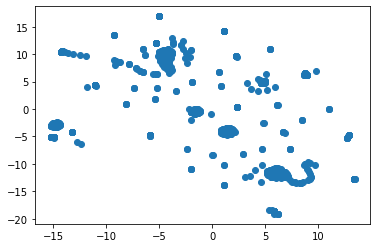

In [21]:
# create a scatter plot of the t-SNE output
x = tsne1features[:,0]
y = tsne1features[:,1]
plt.scatter(x,y)
plt.show

In [22]:
#Use a for-loop to determine the inertia for each k between 1 through 10.
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]
for value in k:
    kmeans = KMeans(n_clusters = value, random_state=0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)
                

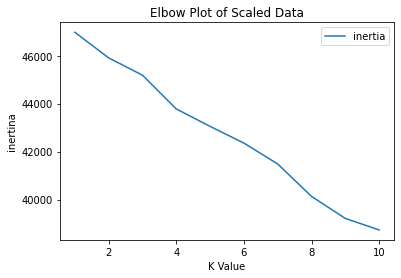

In [23]:
# the elbow of the plot
elbowPlot = pd.DataFrame({'K': k, "inertia": inertia})
elbowPlot.plot.line(x='K', y='inertia')
plt.ylabel('inertina')
plt.xlabel('K Value')
plt.title('Elbow Plot of Scaled Data')
plt.show()